In [1]:
#Required Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1 = pd.read_csv("New_York _Housing _Market.csv")

In [3]:
df1.shape # Rows and Columns

(4801, 17)

In [4]:
df1.head(50)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.000000,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.000000,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.000000,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.000000,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.000000,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027","157 W 126th St Unit 1BNew York, NY 10027",New York,New York County,New York,Manhattan,157,"157 W 126th St #1b, New York, NY 10027, USA",40.809448,-73.946777
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.000000,33000.000000,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424
8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.000000,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.000000,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230","1350 Ocean Pkwy Apt 5GBrooklyn, NY 11230",New York,Kings County,Brooklyn,Midwood,1350,"1350 Ocean Pkwy #5g, Brooklyn, NY 11230, USA",40.615738,-73.969694


In [5]:
# Finding the TYPE of property and the count 
df1.groupby('TYPE')['TYPE'].agg('count')

TYPE
Co-op for sale                1450
Coming Soon                      2
Condo for sale                 891
Condop for sale                  5
Contingent                      88
For sale                        20
Foreclosure                     14
House for sale                1012
Land for sale                   49
Mobile house for sale            1
Multi-family home for sale     727
Pending                        243
Townhouse for sale             299
Name: TYPE, dtype: int64

In [6]:
# Dropping columns we dont need
df2 = df1.drop(['TYPE','BROKERTITLE','ADDRESS','STATE','MAIN_ADDRESS','ADMINISTRATIVE_AREA_LEVEL_2','LOCALITY','STREET_NAME','LONG_NAME','FORMATTED_ADDRESS','LATITUDE','LONGITUDE'],axis='columns')
df2.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,315000,2,2.000000,1400.0,Manhattan
1,195000000,7,10.000000,17545.0,New York County
2,260000,4,2.000000,2015.0,Richmond County
3,69000,3,1.000000,445.0,New York County
4,55000000,7,2.373861,14175.0,New York County


In [7]:
#Handling missing values

In [8]:
df2.isnull().sum()

PRICE           0
BEDS            0
BATH            0
PROPERTYSQFT    0
SUBLOCALITY     0
dtype: int64

In [9]:
# run this if your data set has na values
# df3 = df2.dropna()
#df3.isnull().sum() #checking again if na values have been dropped

In [10]:
df2.shape

(4801, 5)

In [11]:
df2['BEDS'].unique() # checking unique values to check uniformity across elements in a column
# all are numeric values so we can proceed

array([ 2,  7,  4,  3,  5,  8,  1,  6, 12, 10, 11,  9, 15, 14, 16, 20, 35,
       24, 50, 13, 32, 36, 42, 40, 30, 19, 18], dtype=int64)

In [12]:
df2.groupby('BEDS')['BEDS'].agg('count')
#we have to check places with over 9 beds rooms as it may be an typing error and drop those columns.
#we make an educated guess based on the sqft and number of baths columns for this.

BEDS
1      820
2      995
3     1456
4      570
5      360
6      271
7      105
8       84
9       39
10      21
11      20
12      23
13       5
14       7
15       5
16       4
18       1
19       1
20       3
24       3
30       1
32       2
35       1
36       1
40       1
42       1
50       1
Name: BEDS, dtype: int64

In [13]:
df2[df2.BEDS == 10] #Checking 10 beds first

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
29,1299888,10,6.000000,3156.000000,Staten Island
32,1300000,10,8.000000,5040.000000,Staten Island
139,5000000,10,9.000000,6425.000000,New York County
270,3000000,10,10.000000,2184.207862,Kings County
305,1350000,10,5.000000,3383.000000,Kings County
631,29950000,10,13.000000,8750.000000,New York County
921,4800000,10,4.000000,5353.000000,Kings County
1072,9950000,10,10.000000,2184.207862,New York County
1136,1768888,10,10.000000,3933.000000,Kings County
1395,9950000,10,10.000000,8000.000000,New York County


In [14]:
#After looking at the above data we remove rows which seem incorrect corresponding to the bath and sqft data
index_to_drop = [29,270,305,1072,1578,2411,2550,4383,4484]
df2 = df2.drop(index_to_drop)

In [15]:
df2[df2.BEDS == 10]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
32,1300000,10,8.000000,5040.0,Staten Island
139,5000000,10,9.000000,6425.0,New York County
631,29950000,10,13.000000,8750.0,New York County
921,4800000,10,4.000000,5353.0,Kings County
1136,1768888,10,10.000000,3933.0,Kings County
1395,9950000,10,10.000000,8000.0,New York County
1740,3500000,10,8.000000,6201.0,New York County
1815,12000000,10,10.000000,5227.0,New York County
1835,6900000,10,10.000000,6060.0,New York County
2524,1299000,10,6.000000,4500.0,Kings County


In [16]:
df2[df2.BEDS == 11] #Checking 11 beds

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
36,1299888,11,4.0,3156.000000,Staten Island
141,56000000,11,10.0,24000.000000,New York County
929,998000,11,6.0,2184.207862,Kings County
934,1195000,11,6.0,2184.207862,Bronx County
1279,747000,11,1.0,747.000000,New York
1588,1630000,11,6.0,2184.207862,Queens County
1825,19995000,11,11.0,11110.000000,New York County
1944,1299000,11,8.0,4560.000000,Bronx County
2175,2198888,11,6.0,2184.207862,Queens County
2672,1359000,11,6.0,2240.000000,Kings County


In [17]:
index_to_drop = [36,929,934,1279,1588,2175,2672,3084,3510,4031]
df2 = df2.drop(index_to_drop)

In [18]:
df2[df2.BEDS == 11]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
141,56000000,11,10.0,24000.0,New York County
1825,19995000,11,11.0,11110.0,New York County
1944,1299000,11,8.0,4560.0,Bronx County
2762,2599000,11,6.0,5088.0,Queens County
3165,1800000,11,5.0,3969.0,Bronx County
3316,990000,11,9.0,6240.0,Kings County
3354,1149000,11,6.0,4350.0,Queens County
3440,1800000,11,6.0,5000.0,Queens
3534,1208000,11,6.0,5160.0,Queens County
3873,1799000,11,6.0,5031.0,Kings County


In [19]:
df2[df2.BEDS == 12] #Checking 12 beds

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
27,2250000,12,2.373861,5670.000000,New York
133,1150000,12,6.000000,5508.000000,Queens County
222,29200000,12,10.000000,11638.000000,New York County
374,950000,12,6.000000,2184.207862,Queens County
465,825000,12,6.000000,2184.207862,Kings County
532,1998000,12,8.000000,5100.000000,Kings County
1106,999999,12,6.000000,3900.000000,Kings County
1464,1850000,12,8.000000,5250.000000,Kings County
1467,1850000,12,8.000000,5250.000000,Kings County
1491,1550000,12,7.000000,3000.000000,Richmond County


In [20]:
index_to_drop = [374,465,1491,1840,2345,3303,3986,4287,4689,4786]
df2 = df2.drop(index_to_drop)

In [27]:
df2[df2.BEDS > 12] #Checking 12 and above

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
232,1188888,15,9.0,2184.207862,Queens County
469,1300000,15,6.0,4920.000000,Kings County
550,1375000,14,8.0,6000.000000,Bronx County
733,1195000,16,8.0,2184.207862,Kings County
750,7999000,20,10.0,2184.207862,New York County
765,4380000,35,16.0,15000.000000,Kings County
936,2800000,16,16.0,10720.000000,Kings County
1092,3500000,24,8.0,9500.000000,Kings County
1143,11000000,50,50.0,22035.000000,Kings County
1214,6995000,20,20.0,12492.000000,New York County


In [29]:
index_to_drop = [232,733,750,1945,2392,3363,4157,4282,4404,4523,4795]
df2 = df2.drop(index_to_drop)

In [30]:
#Now lets move to checking bath

In [31]:
df2['BATH'].unique()

array([ 2.        , 10.        ,  1.        ,  2.37386086, 16.        ,
        3.        ,  4.        ,  8.        ,  5.        ,  6.        ,
        9.        ,  7.        , 32.        , 13.        , 50.        ,
       20.        , 11.        , 12.        , 24.        , 43.        ,
        0.        , 17.        ])

In [32]:
df2.groupby('BATH')['BATH'].agg('count')
#we have to check places with over 9 bath rooms as it may be an typing error and drop those columns.
#we make an educated guess based on the sqft and number of beds columns for this.

BATH
0.000000        3
1.000000     1520
2.000000     1671
2.373861      302
3.000000      465
4.000000      478
5.000000       97
6.000000      127
7.000000       22
8.000000       41
9.000000        4
10.000000      13
11.000000       2
12.000000       2
13.000000       1
16.000000       5
17.000000       1
20.000000       3
24.000000       1
32.000000       1
43.000000       1
50.000000       1
Name: BATH, dtype: int64

In [33]:
df2[df2.BATH>9]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
1,195000000,7,10.0,17545.000000,New York County
7,16800000,8,16.0,33000.000000,Richmond County
141,56000000,11,10.0,24000.000000,New York County
222,29200000,12,10.0,11638.000000,New York County
622,3000000,3,32.0,11760.000000,Kings County
631,29950000,10,13.0,8750.000000,New York County
765,4380000,35,16.0,15000.000000,Kings County
936,2800000,16,16.0,10720.000000,Kings County
1136,1768888,10,10.0,3933.000000,Kings County
1143,11000000,50,50.0,22035.000000,Kings County


In [34]:
index_to_drop = [622]
df2 = df2.drop(index_to_drop)

In [35]:
#Checking sublocality column

In [36]:
df2['SUBLOCALITY'].unique()

array(['Manhattan', 'New York County', 'Richmond County', 'Kings County',
       'New York', 'East Bronx', 'Brooklyn', 'The Bronx', 'Queens',
       'Staten Island', 'Queens County', 'Bronx County', 'Coney Island',
       'Brooklyn Heights', 'Jackson Heights', 'Riverdale', 'Rego Park',
       'Fort Hamilton', 'Flushing', 'Dumbo', 'Snyder Avenue'],
      dtype=object)

In [37]:
df2.groupby('SUBLOCALITY')['SUBLOCALITY'].agg('count')
#This column looks fine

SUBLOCALITY
Bronx County         304
Brooklyn             462
Brooklyn Heights       1
Coney Island           3
Dumbo                  1
East Bronx             1
Flushing               4
Fort Hamilton          1
Jackson Heights        1
Kings County         714
Manhattan             21
New York            1014
New York County      283
Queens               555
Queens County        669
Rego Park              1
Richmond County      479
Riverdale              4
Snyder Avenue          1
Staten Island         57
The Bronx            184
Name: SUBLOCALITY, dtype: int64

In [38]:
df2['PROPERTYSQFT'].unique()
#This coloumn seems fine

array([ 1400., 17545.,  2015., ...,  7854.,   903.,   655.])

In [40]:
df2.head(10)

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,315000,2,2.000000,1400.000000,Manhattan
1,195000000,7,10.000000,17545.000000,New York County
2,260000,4,2.000000,2015.000000,Richmond County
3,69000,3,1.000000,445.000000,New York County
4,55000000,7,2.373861,14175.000000,New York County
5,690000,5,2.000000,4004.000000,Kings County
6,899500,2,2.000000,2184.207862,New York
7,16800000,8,16.000000,33000.000000,Richmond County
8,265000,1,1.000000,750.000000,East Bronx
9,440000,2,1.000000,978.000000,Brooklyn


In [ ]:
# Since we have cleaned our data we can now move forward 

In [ ]:
# Feature engineering and Dimensionality reduction

In [41]:
df3 = df2.copy()

In [44]:
#In realstate market price per sqft is very important 
df3['PRICE_PER_SQFT'] = df3['PRICE']/df3['PROPERTYSQFT']
df3.head(10)

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,315000,2,2.000000,1400.000000,Manhattan,225.000000
1,195000000,7,10.000000,17545.000000,New York County,11114.277572
2,260000,4,2.000000,2015.000000,Richmond County,129.032258
3,69000,3,1.000000,445.000000,New York County,155.056180
4,55000000,7,2.373861,14175.000000,New York County,3880.070547
5,690000,5,2.000000,4004.000000,Kings County,172.327672
6,899500,2,2.000000,2184.207862,New York,411.819779
7,16800000,8,16.000000,33000.000000,Richmond County,509.090909
8,265000,1,1.000000,750.000000,East Bronx,353.333333
9,440000,2,1.000000,978.000000,Brooklyn,449.897751


In [ ]:
#Lets explore location column its categorical 

In [48]:
location_stats = df3.groupby('SUBLOCALITY')['SUBLOCALITY'].agg('count')
location_stats

SUBLOCALITY
Bronx County         304
Brooklyn             462
Brooklyn Heights       1
Coney Island           3
Dumbo                  1
East Bronx             1
Flushing               4
Fort Hamilton          1
Jackson Heights        1
Kings County         714
Manhattan             21
New York            1014
New York County      283
Queens               555
Queens County        669
Rego Park              1
Richmond County      479
Riverdale              4
Snyder Avenue          1
Staten Island         57
The Bronx            184
Name: SUBLOCALITY, dtype: int64

In [50]:
#Lets group less than 4 data points sublocalites as Other Location
len(location_stats[location_stats < 4])

8

In [52]:
location_stats_less_than_4 = location_stats[location_stats < 4]
location_stats_less_than_4

SUBLOCALITY
Brooklyn Heights    1
Coney Island        3
Dumbo               1
East Bronx          1
Fort Hamilton       1
Jackson Heights     1
Rego Park           1
Snyder Avenue       1
Name: SUBLOCALITY, dtype: int64

In [54]:
df3.SUBLOCALITY = df3.SUBLOCALITY.apply(lambda x: 'Other' if x in location_stats_less_than_4 else x)

In [55]:
len(df3.SUBLOCALITY.unique())

14

In [57]:
df3.head(10)

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
0,315000,2,2.000000,1400.000000,Manhattan,225.000000
1,195000000,7,10.000000,17545.000000,New York County,11114.277572
2,260000,4,2.000000,2015.000000,Richmond County,129.032258
3,69000,3,1.000000,445.000000,New York County,155.056180
4,55000000,7,2.373861,14175.000000,New York County,3880.070547
5,690000,5,2.000000,4004.000000,Kings County,172.327672
6,899500,2,2.000000,2184.207862,New York,411.819779
7,16800000,8,16.000000,33000.000000,Richmond County,509.090909
8,265000,1,1.000000,750.000000,Other,353.333333
9,440000,2,1.000000,978.000000,Brooklyn,449.897751


In [ ]:
# This reduces some dimensions 

In [63]:
# We check for property with sqft per bedroom less than 200 and remove them as it is likely an incorrect data point
df3[df3.PROPERTYSQFT/df3.BEDS < 200].head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
3,69000,3,1.0,445.0,New York County,155.056180
17,199000,3,1.0,325.0,Brooklyn,612.307692
185,549000,5,3.0,496.0,Bronx County,1106.854839
188,65000,3,1.0,230.0,New York,282.608696
277,560000,3,1.0,550.0,New York,1018.181818


In [65]:
df4 = df3[~(df3.PROPERTYSQFT/df3.BEDS < 200)]

In [66]:
df3.shape

(4760, 6)

In [67]:
df4.shape

(4665, 6)

In [68]:
df4.PRICE_PER_SQFT.describe()
#We can see extreme minimum and maximum value which we need to remove

count      4665.000000
mean        821.907667
std        3348.938194
min           1.141833
25%         320.024487
50%         484.375000
75%         812.500000
max      214748.364700
Name: PRICE_PER_SQFT, dtype: float64

In [71]:
#We need to filter out extremes
def remove_pps_outliers(df): #Taking dataframe as input
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('SUBLOCALITY'): #Grouping data frame by location
        m = np.mean(subdf.PRICE_PER_SQFT) #Calculate mean
        st = np.std(subdf.PRICE_PER_SQFT) #Calculate standard deviation
        reduced_df = subdf[(subdf.PRICE_PER_SQFT>(m-st)) & (subdf.PRICE_PER_SQFT<=(m+st))] #Filtering out anything above mean - std and anything below mean + std
        df_out = pd.concat([df_out,reduced_df],ignore_index=True) #Keep on appending
    return df_out

In [73]:
df5 = remove_pps_outliers(df4)
df5.shape

(4152, 6)

In [90]:
## Lets make a scatter plot to see what function we can create to find different bed size houses with similar sqaure footage 2 bed and 3 bed
def plot_scatter_chart(df,SUBLOCALITY): # Take sublocality and df as input
    bhk2 = df[(df.SUBLOCALITY==SUBLOCALITY) & (df.BEDS==2)]
    bhk3 = df[(df.SUBLOCALITY==SUBLOCALITY) & (df.BEDS==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.PROPERTYSQFT,bhk2.PRICE,color='blue',label='2 BHK',s = 50)
    plt.scatter(bhk3.PROPERTYSQFT,bhk3.PRICE,marker='+',color='green',label='3 BHK',s =50)
    plt.xlabel("Total Square Feet Area") #Names the x axis
    plt.ylabel("Price Per Sqaure Feet") # Names the y axis
    plt.title(SUBLOCALITY) # Gives the plot a title
    plt.legend() #creates a legend for the plot
  

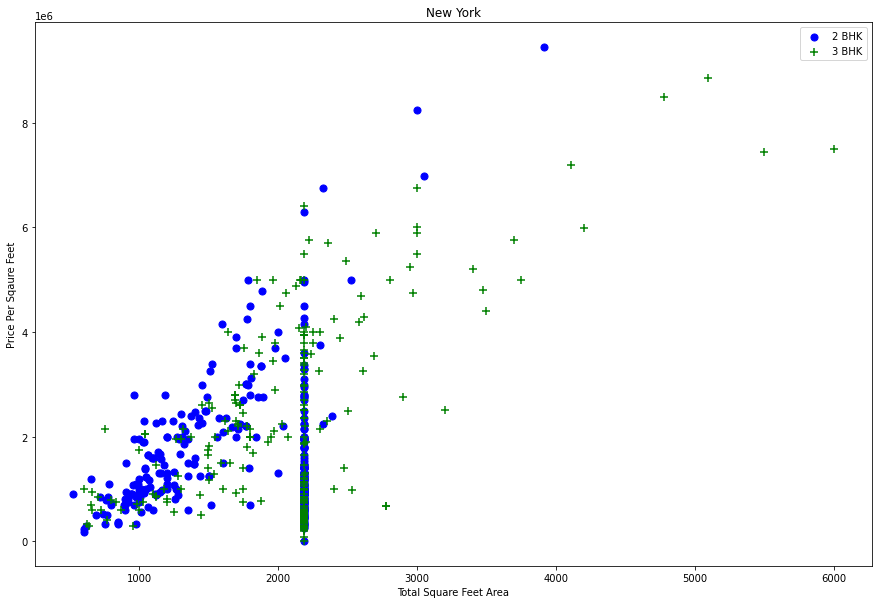

In [91]:
  plot_scatter_chart(df5,"New York")

In [ ]:
# We can see many 2 bhk and 3 bhk have similar, 2 bhk being higher than 3 bhk and vice versa prices.
#Technically 2bhk should be cheaper than 3 bhk with respect to similar sqft of house but prime location and other factors can make things complicated.
#That is why we wont drop any data points here.

In [94]:
 # Lets remove data points of bathrooms which are 2 more than number of bed rooms as it is unusal to have such a place
df5[df5.BATH>df5.BEDS+2]

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,PRICE_PER_SQFT
287,4195000,6,17.0,12733.000000,Bronx County,329.458886
608,2100000,3,8.0,7984.000000,Brooklyn,263.026052
735,2295000,3,7.0,2184.207862,Kings County,1050.724173
911,999000,3,6.0,2184.207862,Kings County,457.374052
913,999000,3,6.0,2184.207862,Kings County,457.374052
1147,1085000,3,8.0,3480.000000,Kings County,311.781609
1179,2749000,3,6.0,4480.000000,Kings County,613.616071
1183,2099000,3,6.0,3520.000000,Kings County,596.306818
1189,1495000,3,6.0,5148.000000,Kings County,290.404040
1287,2599000,3,6.0,4662.000000,Kings County,557.486057


In [96]:
df6 = df5[df5.BATH<df5.BEDS+2]
df6.shape

(4116, 6)

In [100]:
#Lets drop price per sqft now as it has served its purpose for outlier detection
df7 = df6.drop(['PRICE_PER_SQFT'],axis='columns')

In [101]:
df7.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY
0,1100000,6,3.000000,2837.000000,Bronx County
1,925000,5,2.000000,2750.000000,Bronx County
2,700000,6,2.000000,3053.000000,Bronx County
3,119000,3,2.373861,2184.207862,Bronx County
4,600000,2,2.000000,2184.207862,Bronx County


In [103]:
# First we convert categorical sublocality column to numeric by one hot encoding
dummies = pd.get_dummies(df7.SUBLOCALITY)
dummies.head(3)

,Bronx County,Brooklyn,Flushing,Kings County,Manhattan,New York,New York County,Other,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [107]:
df8 = pd.concat([df7,dummies.drop('Other',axis = 'columns')],axis='columns')
df8.head(3)

,PRICE,BEDS,BATH,PROPERTYSQFT,SUBLOCALITY,Bronx County,Brooklyn,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,1100000,6,3.0,2837.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0,0,0
1,925000,5,2.0,2750.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0,0,0
2,700000,6,2.0,3053.0,Bronx County,1,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
#Lets drop SUBLOCALITY now as it has served its purpose for outlier detection
df9 = df8.drop(['SUBLOCALITY'],axis='columns')
df9.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,1100000,6,3.000000,2837.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
1,925000,5,2.000000,2750.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
2,700000,6,2.000000,3053.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3,119000,3,2.373861,2184.207862,1,0,0,0,0,0,0,0,0,0,0,0,0
4,600000,2,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0,0,0


In [111]:
df9.shape

(4116, 17)

In [113]:
#Dropping price because we are trying to predict price with our model
X = df9.drop('PRICE',axis = 'columns')
X.head()

,BEDS,BATH,PROPERTYSQFT,Bronx County,Brooklyn,Flushing,Kings County,Manhattan,New York,New York County,Queens,Queens County,Richmond County,Riverdale,Staten Island,The Bronx
0,6,3.000000,2837.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
1,5,2.000000,2750.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6,2.000000,3053.000000,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2.373861,2184.207862,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2,2.000000,2184.207862,1,0,0,0,0,0,0,0,0,0,0,0,0


In [115]:
y = df9.PRICE
y.head()

0    1100000
1     925000
2     700000
3     119000
4     600000
Name: PRICE, dtype: int64

In [117]:
# dividing data set into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10) #Split into 20% test and 80% train

In [119]:
#Applying linear regression model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train) #model training
lr_clf.score(X_test,y_test) #evaluate score of model

0.5918176472677892

In [121]:
#K fold cross validation

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) #Randomize the sample 

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.35552064, 0.56145021, 0.37307833, 0.5943557 , 0.58375387])

In [135]:
# Finding the best model
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [136]:
find_best_model_using_gridsearchcv(X,y)

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.882e+15, tolerance: 3.304e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.023e+15, tolerance: 3.197e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\sharv\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.067e+15, toleranc

,model,best_score,best_params
0,linear_regression,0.506712,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.493633,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.547713,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [ ]:
# Thes best model so far comes out to be decision tree model
# Since the model accuracy is pretty low we cannot really have a reasonable prediction from it. 54% is good but improvements can be made.


In [143]:
#Creating a function to predict price

def predict_price(SUBLOCALITY,SQFT,BATH,BEDS):    
    loc_index = np.where(X.columns==SUBLOCALITY)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = BEDS
    x[1] = BATH
    x[2] = SQFT
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [145]:
predict_price('New York',2000,2,2) # Lets try to predict price of 2000 sqft 2 bed 2 bath in New York with Linear Regression which gave initial score of 59%

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1876667.9987864594

In [146]:
# So we need $1.8 Million atleast to buy a 2 Bed 2 bath in 1000 sqft in Newyork